In [ ]:
pip install selenium

In [ ]:
pip install openpyxl

In [ ]:
pip install pandas

In [ ]:
pip install wordcloud

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from openpyxl import Workbook
import pandas as pd
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 텍스트 분석을 위한 댓글 크롤러 만들기
# Driver를 읽어오기
driver = webdriver.Chrome("chromedriver.exe")
# 크롬화면을 최대로 키운다 
driver.maximize_window()
a=input("유튜브명 : ")
url = "https://www.youtube.com/results?search_query={}".format(a)
driver.get(url)
driver.implicitly_wait(3)

time.sleep(1.5)
driver.refresh()
element = driver.find_element(By.ID, "text")
element.click()
element = driver.find_element(By.LINK_TEXT, "동영상")
element.click()
time.sleep(3)

last_height = driver.execute_script("return document.documentElement.scrollHeight")
num_scrolls = 2
url_list = []

for i in range(num_scrolls):
    #처음부터 끝까지 스크롤을 내려 해당내용 크롤링
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight)")
    time.sleep(1.5)
    # 스크롤을 내렸을 때 더 이상 내용이 없을 때
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    
    if new_height == last_height:
        break
        
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, "html.parser")
    
# 동영상의 url이 포함된 요소를 찾기
parent_elements = soup.find_all(class_ = 'yt-simple-endpoint style-scope ytd-playlist-thumbnail')
# 동영상의 요소의 href값을 추출해 저장하기
for parent_element in parent_elements:
    url = parent_element['href']
    url_list.append('https://www.youtube.com' + url)
    
# 저장된 url 리스트를 프린트 하시오
url_list=list(set(url_list))
print(url_list)

#유료 가입 광고 무시하기
try:
    driver.find_element_by_css_selector("#dismiss-button > a").click()
except:
    pass

In [6]:
url_list = []

In [7]:
url_list.append("https://www.youtube.com/watch?v=dpBe3CeHqMs&t=27s")
url_list.append("https://www.youtube.com/watch?v=9eYYH7hQvaI&t=5s")
url_list.append("https://www.youtube.com/watch?v=tq9dGbODo3A&t=1230s")
url_list.append("https://www.youtube.com/watch?v=q1yiAezjReY")
url_list.append("https://www.youtube.com/watch?v=AW3_AqvwRrA")

In [8]:
len(url_list)

5

In [9]:
url_list

['https://www.youtube.com/watch?v=dpBe3CeHqMs&t=27s',
 'https://www.youtube.com/watch?v=9eYYH7hQvaI&t=5s',
 'https://www.youtube.com/watch?v=tq9dGbODo3A&t=1230s',
 'https://www.youtube.com/watch?v=q1yiAezjReY',
 'https://www.youtube.com/watch?v=AW3_AqvwRrA']

In [10]:
driver = webdriver.Chrome("chromedriver.exe")

urls=url_list[0:5]
id =[]
comment=[]

for url in urls:
    driver.get(url)
    driver.implicitly_wait(3)

    time.sleep(3)

    last_height = driver.execute_script("return document.documentElement.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(1.5)

        new_height = driver.execute_script("return document.documentElement.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    time.sleep(1.5)

    try:
        driver.find_element_by_css_selector("#dismiss-button > a").click()
    except:
            pass
        
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'html.parser')

    id_list = soup.select("div#header-author > h3 > #author-text > span")
    comment_list = soup.select("yt-formatted-string#content-text")
    for i, j in zip(id_list,comment_list):
        id.append(i)
        comment.append(j)

In [11]:
id_final = []
comment_final = []

for i in range(len(id)):
    temp_id = id[i].text
    temp_id = temp_id.replace('\n', '')
    temp_id = temp_id.replace('\t', '')
    temp_id = temp_id.replace('    ', '')
    id_final.append(temp_id) # 댓글 작성자

    temp_comment = comment[i].text
    temp_comment = temp_comment.replace('\n', '')
    temp_comment = temp_comment.replace('\t', '')
    temp_comment = temp_comment.replace('    ', '')
    comment_final.append(temp_comment) # 댓글 내용

In [12]:
# 저장된 내용을 아이디, 댓글 내용를 가지도록 dict으로 저장
pd_data = {"아이디" : id_final, "댓글 내용" : comment_final}

# 데이터 프레임으로 변환
youtube_pd = pd.DataFrame(pd_data)

# 데이터를 xlsx로 저장 index=False 데이터의 순서 번호 제거
youtube_pd.to_excel("yo.xlsx", index=False)
df = pd.read_excel("yo.xlsx")
df.to_csv("yo.csv ", index=False, encoding="utf-8-sig")

In [13]:
df["아이디"]

0         감스트GAMST
1              람람람
2              끔찍한
3            흑화한뉴비
4              고도우
           ...    
2988           부사김
2989           유기범
2990           고반장
2991          szxc
2992           이휘성
Name: 아이디, Length: 2993, dtype: object

In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.font_manager as fm

for f in fm.fontManager.ttflist:
    if 'Na' in f.name:
        print(f.name, f.fname)

In [16]:
f.fname

'C:\\Windows\\Fonts\\HANDotum.ttf'

In [17]:
# 폰트 경로 설정
font_path = 'C:\\Windows\\Fonts\\HANDotum.ttf'

In [48]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add("ㅋㅋ")
stopwords.add("ㅎㅎ")
stopwords.add("너무")
stopwords.add("진짜")
stopwords.add("와")

In [26]:
with open("stopwords.txt", encoding="utf-8") as f:
    stopwords = set(f.read().splitlines())

In [49]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# CSV 파일을 pandas 데이터프레임으로 읽어옴
#df = pd.read_csv('파일이름.csv',encoding='utf-8')

# 댓글 내용이 저장된 컬럼 선택
comment_col = '댓글 내용'
comment_list = df[comment_col].tolist()
new_list = []
for x in comment_list:
    new_list.append(str(x))

# 모든 댓글 내용을 하나의 문자열로 결합
text = ' '.join(new_list)

In [51]:
text

'인기동영상 갈수 있게 좋아요 한번씩 꼭 부탁드립니다!! 출연자분들 건강은 걱정되지만ㅋㅋㅠㅠ 챌린지 시리즈 정말 재밌어요ㅋㅋㅋ 해산물 챌린지, 육류 챌린지(흔한 음식에서 점점 독특한걸로) 같은 것도 언젠가 볼 수 있길 기대해봅니다,,, 몸에 안좋은거 아시면서까지 시청자들 위해 위험한컨텐츠도 해주시는 감컴퍼니분들 모습 감동입니다 항상 재밌게 시청하고 좋아요 꼭 누르겠습니당그런의미로 (건강한or몸보신 음식 챌린지) 보고싶습니다 허..짠맛 챌린지는 ㄹㅇ 건강 버려가면서 까지 하는거다 스트형 ㅠㅠㅠ 얼마나 방송에 진심인거야 진짜 토요일날 밤에는 감스트 챌린지로 웃음 채운다 ㅋㅋㅋㅋㅋㅋㅋㅋ 항상 재밌고 알찬 컨텐츠 올려주셔서 감사해요영상도 길어서 편집도 힘드실 것 같은데 항상 초심 잃지 않고 밸런스 유지하시는거 너무 존경스러워요!영상 찍는 동안 건강한 모습만 보여주세요 진짜 댓글 잘 안다는 성격인데 감스트 채널의 음식챌린지는 신의 한 수닼ㅋㅋㅋ 잘 뽑았움 ㄹㅇ ㅋㅋㅋㅋㅋ 마빡님 이상한 음식도 깨작깨작 안먹고 열심히 챌린지 진행하시는거 진짜 멋져요 언제나 믿고보는 스트형 챌린지 컨텐츠 !!너무 재밌고 항상 올려줘서 고마워 형  마빡이 깨작깨작 안먹고 컨텐츠 열심히 하는거 진짜 멋지다 ㅋㅋㅋㅋ진짜 인직이형 마빡 하꼬 때부터 지금까지 너무 잘 데리고 있었다 마빡이가 열심히한 만큼 지금 잘되는데 감스트 마빡 조합도 마빡이가 조금 더 편하게 대하면서너무 웃겨졌다 너무 재밌는 시리즈인만큼 오래보고싶어요ㅜㅡㅜ 건강해치지않는선에서 조심히 하세용 진짜 형 몸조심해 스트레스도 받지 않게 조심하구... 요즘 감스트 너무 재미있음 ㅋㅋ 피파복귀후 부터 봤는데 챌린지도 하니까 개재미있음 재미있는거 많이해줘요 마빡이 걱정해주는게 보여서 스트형이 마빡이 얼마나 아끼는지 보인다,,,, 이왕 이렇게 된거 행복챌린지 이런거해줘요 우리 스트형도 힐링방송하는거 보고싶어요 감스트 마빡 걱정해주는거 너무 보기 좋다 이번편 마빡이가 진짜 개웃기네 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ아 의자 올라가는거에서 저항

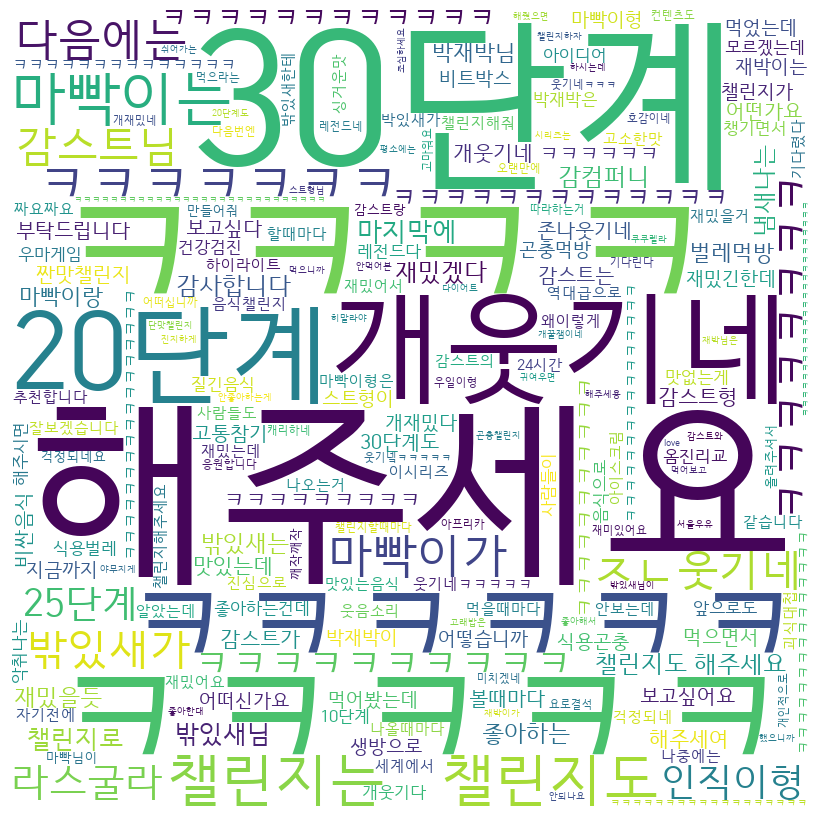

In [53]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,width=800, height=800,
                      background_color='white',stopwords=stopwords, min_word_length=4).generate(text)

# 단어의 빈도 계산
wordcloud.generate_from_frequencies(wordcloud.process_text(text.lower()))
word_freq = wordcloud.process_text(text.lower())

# 워드 클라우드 출력
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

# 파일로 저장
plt.savefig('wordcloud.png')


In [56]:
freq_word = []

In [62]:
##문제 정답

# 해당 숫자보다 낮은 빈도의 단어를 도출함
word_num = {}
for word, freq in word_freq.items():
    if freq > 3: #해당 단어의 빈도수 보다 높은 단어 도출
        word_num[word] = freq

# 높은 빈도의 단어를 프린트함
for word, frequency in word_num.items():
    print(("{}").format(word))
    freq_word.append(word)

부탁드립니다
챌린지는
챌린지로
ㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋ
인직이형
지금까지
마빡이가
챌린지도
스트형이
보고싶어요
개웃기네
재밌긴한데
챙기면서
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋ
마빡이는
20단계
재밌는데
마빡이형
ㅋㅋㅋㅋ
박재박님
감스트님
레전드다
박있새가
생방으로
마지막에
웃음소리
개웃기다
역대급으로
감스트는
사람들이
보고싶다
감컴퍼니
ㅈㄴ웃기네
이시리즈
볼때마다
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋ
해주세요
먹어봤는데
짠맛챌린지
웃기네ㅋㅋㅋㅋㅋ
밖있새가
기다렸다
고통참기
냄새나는
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
다음에는
마빡이랑
건강검진
짜요짜요
박재박이
재박이는
할때마다
먹으면서
25단계
감사합니다
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
알았는데
밖있새님
먹었는데
싱거운맛
진심으로
30단계
해주세여
나중에는
하이라이트
박재박은
사람들도
걱정되네
재밌겠다
재밌을듯
좋아하는
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
감스트의
추천합니다
잘보겠습니다
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
모르겠는데
해주시면
비싼음식
식용곤충
ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
어떤가요
벌레먹방
어떠신가요
질긴음식
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
왜이렇게
먹을때마다
어떻습니까
옴진리교
나오는거
식용벌레
감스트가
챌린지가
감스트형
개재밌다
존나웃기네
자기전에
음식챌린지
10단계
챌린지해줘
재밌어요
라스굴라
비트박스
마빡이형은
맛있는음식
음식으로
악취나는
나올때마다
좋아하는건데
재밌을거
재밌어서
고소한맛
맛없는게
30단계도
밖있새는
곤충먹방
맛있는데
24시간
우마게임
챌린지해주세요
밖있새한테
아이스크림
세계에서
아이디어
같습니다
앞으로도
안보는데
괴식대첩
챌린지도 해주세요
개웃기네 ㅋㅋㅋㅋㅋㅋ


In [63]:
freq_word

['부탁드립니다',
 '챌린지는',
 '챌린지로',
 'ㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋ',
 '인직이형',
 '지금까지',
 '마빡이가',
 '챌린지도',
 '스트형이',
 '보고싶어요',
 '개웃기네',
 '재밌긴한데',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋ',
 '마빡이는',
 '20단계',
 '마빡이형',
 'ㅋㅋㅋㅋ',
 '박재박님',
 '감스트님',
 '생방으로',
 '마지막에',
 '감스트는',
 '보고싶다',
 '감컴퍼니',
 'ㅈㄴ웃기네',
 '볼때마다',
 'ㅋㅋㅋㅋㅋㅋㅋ',
 '해주세요',
 '먹어봤는데',
 '짠맛챌린지',
 '밖있새가',
 '고통참기',
 '냄새나는',
 '다음에는',
 '마빡이랑',
 '박재박이',
 '재박이는',
 '먹으면서',
 '25단계',
 '감사합니다',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '밖있새님',
 '먹었는데',
 '30단계',
 '해주세여',
 '재밌겠다',
 '재밌을듯',
 '좋아하는',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '비싼음식',
 '식용곤충',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '어떤가요',
 '벌레먹방',
 '어떠신가요',
 '어떻습니까',
 '감스트가',
 '챌린지가',
 '감스트형',
 '개재밌다',
 '존나웃기네',
 '라스굴라',
 '비트박스',
 '30단계도',
 '밖있새는',
 '곤충먹방',
 '맛있는데',
 '챌린지도 해주세요',
 '개웃기네 ㅋㅋㅋㅋㅋㅋ',
 '부탁드립니다',
 '챌린지는',
 '챌린지로',
 'ㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋ',
 '인직이형',
 '지금까지',
 '마빡이가',
 '챌린지도',
 '스트형이',
 '보고싶어요',
 '개웃기네',
 '재밌긴한데',
 '챙기면서',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋ',
 '마빡이는',
 '20단계',
 '마빡이형',
 'ㅋㅋㅋㅋ',
 '박재박님',
 '감스트님',
 '레전드다',
 '생방으로',
 '마지막에',
 '개웃기다',
 '감스트는',
 '사람들이',
 '보고싶다',
 '감컴퍼

In [66]:
gam = []
for i in freq_word:
    if "맛" in i or "곤충" in i:
        gam.append(i)

In [67]:
gam

['짠맛챌린지',
 '식용곤충',
 '곤충먹방',
 '맛있는데',
 '짠맛챌린지',
 '식용곤충',
 '맛없는게',
 '곤충먹방',
 '맛있는데',
 '짠맛챌린지',
 '싱거운맛',
 '식용곤충',
 '맛있는음식',
 '고소한맛',
 '맛없는게',
 '곤충먹방',
 '맛있는데']

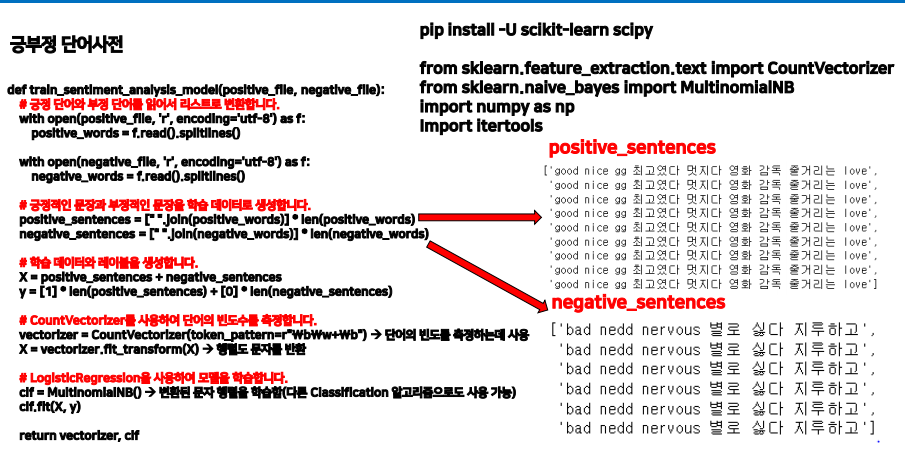

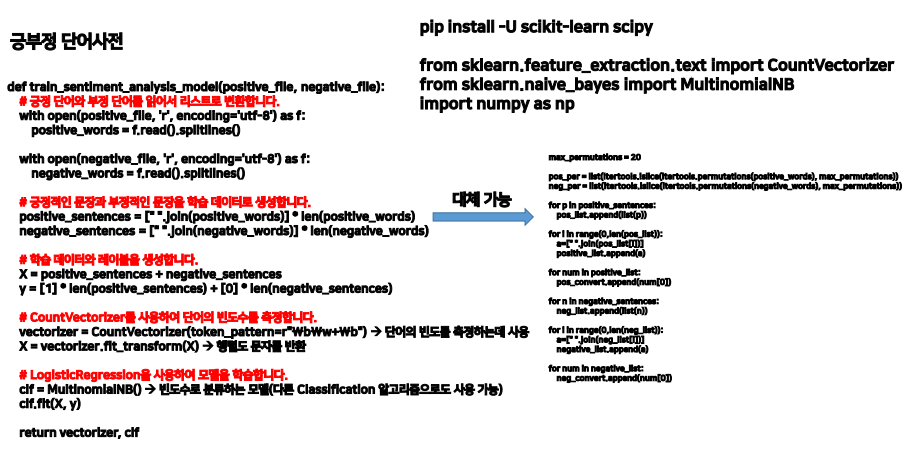

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import itertools

In [32]:
def train_sentiment_analysis_model(positive_file, negative_file):
    # 긍정 단어와 부정 단어를 읽어서 리스트로 변환합니다.
    with open(positive_file, 'r', encoding='utf-8') as f:
        positive_words = f.read().splitlines()

    with open(negative_file, 'r', encoding='utf-8') as f:
        negative_words = f.read().splitlines()

    # 긍정적인 문장과 부정적인 문장을 학습 데이터로 생성합니다.
    positive_sentences = [" ".join(positive_words)] * len(positive_words)
    negative_sentences = [" ".join(negative_words)] * len(negative_words)

    # 학습 데이터와 레이블을 생성합니다.
    X = positive_sentences + negative_sentences
    y = [1] * len(positive_sentences) + [0] * len(negative_sentences)

    # CountVectorizer를 사용하여 단어의 빈도수를 측정합니다.
    vectorizer = CountVectorizer(token_pattern=r"\b\w+\b") 
    X = vectorizer.fit_transform(X)

    # LogisticRegression을 사용하여 모델을 학습합니다.
    clf = MultinomialNB()
    clf.fit(X, y)

    return vectorizer, clf

In [ ]:
import itertools
import numpy as np

pos_list = []
neg_list = []
positive_list=[]
negative_list=[]
pos_convert=[]
neg_convert=[]

def train_sentiment_analysis_model(positive_file, negative_file):
    # 긍정 단어와 부정 단어를 읽어서 리스트로 변환합니다.
    with open(positive_file, 'r', encoding='utf-8') as f:
        positive_words = f.read().splitlines()

    with open(negative_file, 'r', encoding='utf-8') as f:
        negative_words = f.read().splitlines()

    max_permutations = 20

    pos_per = list(itertools.islice(itertools.permutations(positive_words), max_permutations))
    neg_per = list(itertools.islice(itertools.permutations(negative_words), max_permutations))

    for p in positive_sentences:
        pos_list.append(list(p))

    for i in range(0,len(pos_list)):
        a=[" ".join(pos_list[i])]
        positive_list.append(a)

    for num in positive_list:
        pos_convert.append(num[0])
    
    for n in negative_sentences:
        neg_list.append(list(n))

    for i in range(0,len(neg_list)):
        a=[" ".join(neg_list[i])]
        negative_list.append(a)

    for num in negative_list:
        neg_convert.append(num[0])

    # 학습 데이터와 레이블을 생성합니다.
    X = pos_convert + neg_convert
    y = [1] * len(pos_convert) + [0] * len(neg_convert)

    # CountVectorizer를 사용하여 단어의 빈도수를 측정합니다.
    vectorizer = CountVectorizer(token_pattern=r"\b\w+\b")
    X = vectorizer.fit_transform(X)
    # LogisticRegression을 사용하여 모델을 학습합니다.
    clf = MultinomialNB()
    clf.fit(X, y)

    return vectorizer, clf

In [33]:
def predict_sentiment_analysis(text, vectorizer, clf):
    # 입력된 텍스트를 벡터화합니다.
    X = vectorizer.transform([text])

    # 모델을 사용하여 감성을 예측합니다.
    y_pred = clf.predict(X)

    # 예측 결과에 따라 출력 메시지와 카운트 정보를 선택합니다.
    if y_pred[0] == 1:
        result = {"sentiment": "긍정적인 단어", "positive_count": 1, "negative_count": 0}
    else:
        result = {"sentiment": "부정적인 단어", "positive_count": 0, "negative_count": 1}

    # 입력된 텍스트에 포함된 긍정 단어와 부정 단어를 카운트합니다.
    for word in text.split():
        if word in positive_words:
            result["positive_count"] += 1
        elif word in negative_words:
            result["negative_count"] += 1

    return result

In [34]:
with open('positive_file.txt', 'r',encoding='utf-8') as f:
    positive_words = f.read().splitlines()

with open('negative_file.txt', 'r',encoding='utf-8') as f:
    negative_words = f.read().splitlines()

In [35]:
vectorizer, clf=train_sentiment_analysis_model("positive_file.txt","negative_file.txt")
text = input("분석할 문자열을 입력하세요: ")

predict_sentiment_analysis(text, vectorizer, clf)

분석할 문자열을 입력하세요: 개별로


{'sentiment': '부정적인 단어', 'positive_count': 0, 'negative_count': 2}

In [36]:
df = pd.read_csv("yo.csv", encoding='utf-8-sig')
comment_col = '댓글 내용'
comment_list = df[comment_col].tolist()
new_list = []
for x in comment_list:
    new_list.append(str(x))

In [37]:
##문제 정답
emotion = []
for comment in new_list:
    prediction = predict_sentiment_analysis(comment, vectorizer, clf)
    emotion.append(prediction['sentiment'])

df["감정"]=pd.DataFrame(emotion)

In [38]:
print(df)

             아이디                                              댓글 내용       감정
0       감스트GAMST                     인기동영상 갈수 있게 좋아요 한번씩 꼭 부탁드립니다!!  긍정적인 단어
1            람람람  출연자분들 건강은 걱정되지만ㅋㅋㅠㅠ 챌린지 시리즈 정말 재밌어요ㅋㅋㅋ 해산물 챌린지...  긍정적인 단어
2            끔찍한  몸에 안좋은거 아시면서까지 시청자들 위해 위험한컨텐츠도 해주시는 감컴퍼니분들 모습 ...  긍정적인 단어
3          흑화한뉴비  허..짠맛 챌린지는 ㄹㅇ 건강 버려가면서 까지 하는거다 스트형 ㅠㅠㅠ 얼마나 방송에...  부정적인 단어
4            고도우               진짜 토요일날 밤에는 감스트 챌린지로 웃음 채운다 ㅋㅋㅋㅋㅋㅋㅋㅋ  부정적인 단어
...          ...                                                ...      ...
2988         부사김                                             너무오바한다  부정적인 단어
2989         유기범                                                NaN  부정적인 단어
2990         고반장                              상디인지 뭔지 왜케 애 자체가 재미없냐  부정적인 단어
2991        szxc                             상디인지 뭔지 재는 관상이 왤케 안 좋냐  부정적인 단어
2992         이휘성     왤케 오바를 떠냐 감스트는 그냥 모든 영상이 다 오바야 좀 인간적인 모습 좀 보여라  부정적인 단어

[2993 rows x 3 columns]


In [39]:
df

,아이디,댓글 내용,감정
0,감스트GAMST,인기동영상 갈수 있게 좋아요 한번씩 꼭 부탁드립니다!!,긍정적인 단어
1,람람람,출연자분들 건강은 걱정되지만ㅋㅋㅠㅠ 챌린지 시리즈 정말 재밌어요ㅋㅋㅋ 해산물 챌린지...,긍정적인 단어
2,끔찍한,몸에 안좋은거 아시면서까지 시청자들 위해 위험한컨텐츠도 해주시는 감컴퍼니분들 모습 ...,긍정적인 단어
3,흑화한뉴비,허..짠맛 챌린지는 ㄹㅇ 건강 버려가면서 까지 하는거다 스트형 ㅠㅠㅠ 얼마나 방송에...,부정적인 단어
4,고도우,진짜 토요일날 밤에는 감스트 챌린지로 웃음 채운다 ㅋㅋㅋㅋㅋㅋㅋㅋ,부정적인 단어
...,...,...,...
2988,부사김,너무오바한다,부정적인 단어
2989,유기범,NaN,부정적인 단어
2990,고반장,상디인지 뭔지 왜케 애 자체가 재미없냐,부정적인 단어
2991,szxc,상디인지 뭔지 재는 관상이 왤케 안 좋냐,부정적인 단어


In [40]:
df.to_excel("emotion.xlsx", index=False)

In [89]:
df[["감정"]]

,감정
0,긍정적인 단어
1,긍정적인 단어
2,긍정적인 단어
3,부정적인 단어
4,부정적인 단어
...,...
2988,부정적인 단어
2989,부정적인 단어
2990,부정적인 단어
2991,부정적인 단어


In [92]:
# 댓글 내용이 저장된 컬럼 선택
new_list = []
for i in df:
    new_list.append(i)

# 모든 댓글 내용을 하나의 문자열로 결합
text = ' '.join(new_list)

In [93]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,width=800, height=800,
                      background_color='white',stopwords=stopwords, min_word_length=4).generate(text)

# 단어의 빈도 계산
wordcloud.generate_from_frequencies(wordcloud.process_text(text.lower()))
word_freq = wordcloud.process_text(text.lower())

# 워드 클라우드 출력
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

ValueError: We need at least 1 word to plot a word cloud, got 0.